In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
import random
from sklearn.utils import resample
from sklearn.externals import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#import Data
X_train = pickle.load(open("X_train_features.pkl", 'rb'))
y_train = pickle.load(open("y_train_features.pkl", 'rb'))
X_validation = pickle.load(open("X_validation_features.pkl", 'rb'))
y_validation = pickle.load(open("y_validation_features.pkl", 'rb'))

Lin_features = pickle.load(open('bestFeatures.pkl', 'rb'))


In [3]:
print(str(len(Lin_features)) + " of the original " + str(len(X_train.columns)) + " are now being used")

240 of the original 580 are now being used


In [4]:
#Liimit the input data by the feature columns
feature_X_train = X_train[Lin_features].values
feature_X_val = X_validation[Lin_features].values

print(len(X_validation.columns))

580


In [5]:
#import unprocessed original data
traindf = pd.read_csv("train.csv")
validationdf = pd.read_csv("validation.csv")

In [6]:
avgCTR = traindf["click"].sum()*100/traindf.shape[0]

avgBid_training = traindf.loc[traindf["click"] == 1, "payprice"].mean()

print("In the training data, the average CTR is: %.4f , and the average BID is: $%.2f"
      % (avgCTR, avgBid_training))


bid_list = list(range(traindf.loc[traindf["click"] == 1, "payprice"].min(),300, 5))

In the training data, the average CTR is: 0.0738 , and the average BID is: $105.46


In [ ]:
clf = LogisticRegression(C = 0.1, random_state = 123)
clf.fit(feature_X_train, y_train)

predict = clf.predict_proba(feature_X_val)
predict_proba_list = clf.predict_proba(feature_X_val)

validationdf['click_proba'] = [item[1] for item in predict_proba_list]


In [8]:

def lin_bid(base_bid, budget = 6250000):
    
    bid = (base_bid * validationdf["click_proba"]) / avgCTR
        
    counter = 0
    clicks = 0
    imp = 0
    spent = 0
    
    while ((budget >= 0) & (counter < len(validationdf))):

        if(validationdf['payprice'][counter] < bid[counter]):
            budget -= validationdf['payprice'][counter]
            spent += validationdf["payprice"][counter]
            clicks += validationdf['click'][counter]
            imp += 1
            
        counter += 1
        
    ctr = clicks*100/imp
    cpm = spent/imp
    cpc = spent/clicks/1000
    spent = round(spent/6250000 *100)
    
    
    return clicks, ctr, spent, cpm, cpc, imp

In [9]:
clicks_list = []
imp_list = []

for bid in bid_list:
    
    clicks, ctr, spent, cpm, cpc, imp = lin_bid(bid)
    print("Bidding $ %s scores:: %s clicks, %.5f ctr, %s spent, %.2f cpm, %.2f cpc, %s imp"  
          % (bid, clicks, ctr, spent, cpm, cpc, imp))
    clicks_list.append(clicks)
    imp_list.append(imp)    

Bidding $ 4 scores:: 7 clicks, 0.24138 ctr, 0.0 spent, 8.00 cpm, 3.31 cpc, 2900 imp
Bidding $ 9 scores:: 39 clicks, 0.40528 ctr, 2.0 spent, 14.08 cpm, 3.48 cpc, 9623 imp
Bidding $ 14 scores:: 60 clicks, 0.34388 ctr, 5.0 spent, 18.27 cpm, 5.31 cpc, 17448 imp
Bidding $ 19 scores:: 73 clicks, 0.28254 ctr, 9.0 spent, 22.09 cpm, 7.82 cpc, 25837 imp
Bidding $ 24 scores:: 82 clicks, 0.23393 ctr, 14.0 spent, 25.26 cpm, 10.80 cpc, 35053 imp
Bidding $ 29 scores:: 96 clicks, 0.21511 ctr, 20.0 spent, 27.78 cpm, 12.92 cpc, 44628 imp
Bidding $ 34 scores:: 103 clicks, 0.19154 ctr, 26.0 spent, 29.97 cpm, 15.65 cpc, 53776 imp
Bidding $ 39 scores:: 115 clicks, 0.18302 ctr, 32.0 spent, 31.92 cpm, 17.44 cpc, 62835 imp
Bidding $ 44 scores:: 119 clicks, 0.16637 ctr, 39.0 spent, 33.90 cpm, 20.38 cpc, 71527 imp
Bidding $ 49 scores:: 122 clicks, 0.15232 ctr, 46.0 spent, 35.84 cpm, 23.53 cpc, 80092 imp
Bidding $ 54 scores:: 128 clicks, 0.14488 ctr, 53.0 spent, 37.53 cpm, 25.90 cpc, 88352 imp
Bidding $ 59 scores

Text(0, 0.5, '# of Impressions')

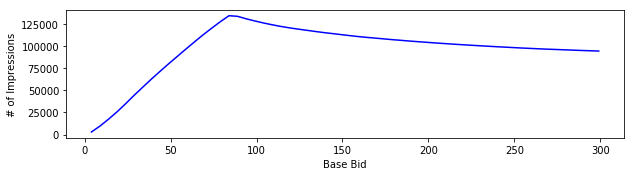

In [10]:
plt.figure(figsize = (10,8))

plt.subplot(3,1,1)
plt.plot(bid_list, imp_list, "b-" )
plt.xlabel("Base Bid")
plt.ylabel("# of Impressions")

Text(0, 0.5, '# of Clicks')

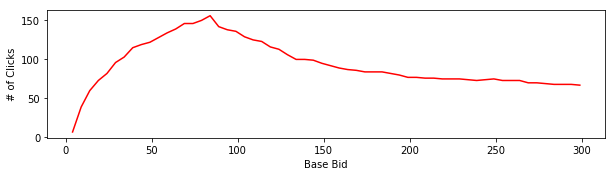

In [11]:
plt.figure(figsize = (10,8))

plt.subplot(3,1,1)
plt.plot(bid_list, clicks_list, "r")

plt.xlabel("Base Bid")
plt.ylabel("# of Clicks")

In [15]:
bid = 85
clicks, ctr, spent, cpm, cpc, imp = lin_bid(bid)
print("THE BEST BID IS")
print("Bidding $ %s scores:: %s clicks, %.5f ctr, %s spent, %.2f cpm, %.2f cpc, %s imp"  
      % (bid, clicks, ctr, spent, cpm, cpc, imp))


THE BEST BID IS
Bidding $ 85 scores:: 157 clicks, 0.11579 ctr, 100.0 spent, 46.04 cpm, 39.76 cpc, 135587 imp
